In [1]:
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

from matplotlib.path import Path

from scipy.spatial import distance



## Read one game's moments and events dataset

In [70]:
moments_df = pd.read_json("0021500003.json") 

## Create dataframe for movement data appended with events

In [71]:
with open('0021500003.json') as data_file:    
    data = json.load(data_file)
json_normalize(data['events'])

,eventId,home.abbreviation,home.name,home.players,home.teamid,moments,visitor.abbreviation,visitor.name,visitor.players,visitor.teamid
0,1,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001336003, 720.0, 24.0, None, [[-1, -...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740
1,2,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001336003, 720.0, 24.0, None, [[-1, -...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740
2,3,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001336003, 720.0, 24.0, None, [[-1, -...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740
3,4,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001349003, 711.22, 16.05, None, [[-1,...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740
4,5,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001361003, 699.15, 15.36, None, [[-1,...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740
5,6,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001376002, 684.07, 14.81, None, [[-1,...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740
6,7,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001398003, 661.94, 7.05, None, [[-1, ...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740
7,8,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001398003, 661.94, 7.05, None, [[-1, ...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740
8,9,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001419002, 640.82, 8.85, None, [[-1, ...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740
9,10,GSW,Golden State Warriors,"[{u'playerid': 2571, u'lastname': u'Barbosa', ...",1610612744,"[[1, 1446001419002, 640.82, 8.85, None, [[-1, ...",NOP,New Orleans Pelicans,"[{u'playerid': 2570, u'lastname': u'Perkins', ...",1610612740


## Helper method to grab moments for a eventNum (possession)

In [40]:
def MomentsfromEventNum(eventsData, eventNumPBP):
    found = False
    searchDirection = None
    sportVUIndex = eventNumPBP
    eventsLen = len(data['events'])-1
    if(eventsLen < sportVUIndex):
        sportVUIndex = eventsLen
    
    while(not found):        
        if( int(eventsData['events'][sportVUIndex]['eventId']) == eventNumPBP):
            found = True
        elif ( int(eventsData['events'][sportVUIndex]['eventId']) > eventNumPBP ):
            if(searchDirection is None and sportVUIndex > 0):
                searchDirection = "decrementIndex"
                sportVUIndex -= 1  
            elif(searchDirection is "decrementIndex" and sportVUIndex > 0):
                sportVUIndex -= 1  
            elif(searchDirection is "incrementIndex"):
                return None
            else: #we have reached 0th index and cant traverse up the list anymore
                return None
        elif ( int(eventsData['events'][sportVUIndex]['eventId']) < eventNumPBP ):
            if(searchDirection is None and sportVUIndex < eventsLen):
                searchDirection = "incrementIndex"
                sportVUIndex += 1  
            elif(searchDirection is "incrementIndex" and sportVUIndex < eventsLen):
                sportVUIndex += 1  
            elif(searchDirection is "decrementIndex"):
                return None
            else: #we have reached 0th index and cant traverse up the list anymore
                return None
        
    return eventsData['events'][sportVUIndex]["moments"]

## In array of events , select 23rd row "possession" to get all moments data

In [74]:
MomentsfromEventNum(data,182)

[[2,
  1446003760616L,
  489.0,
  24.0,
  None,
  [[-1, -1, 15.09284, 41.58354, 1.49937],
   [1610612744, 2738, 35.57021, 12.47839, 0.0],
   [1610612744, 2571, 31.12287, 19.64168, 0.0],
   [1610612744, 2733, 56.50641, 23.96858, 0.0],
   [1610612744, 201578, 45.24406, 27.11907, 0.0],
   [1610612744, 202691, 39.39285, 26.42117, 0.0],
   [1610612740, 201967, 10.90084, 47.40949, 0.0],
   [1610612740, 202087, 35.44894, 20.61167, 0.0],
   [1610612740, 201583, 41.57937, 23.92484, 0.0],
   [1610612740, 202397, 16.79331, 28.59205, 0.0],
   [1610612740, 203076, 37.21911, 25.02993, 0.0]]],
 [2,
  1446003760656L,
  489.0,
  24.0,
  None,
  [[-1, -1, 15.10833, 41.712, 1.5732],
   [1610612744, 2738, 35.77043, 12.53236, 0.0],
   [1610612744, 2571, 31.25651, 19.7328, 0.0],
   [1610612744, 2733, 56.62925, 23.90102, 0.0],
   [1610612744, 201578, 45.48223, 27.09829, 0.0],
   [1610612744, 202691, 39.56807, 26.4239, 0.0],
   [1610612740, 201967, 11.02481, 47.52903, 0.0],
   [1610612740, 202087, 35.63739, 2

In [80]:
data['events'][1]

{u'eventId': u'207',
 u'home': {u'abbreviation': u'GSW',
  u'name': u'Golden State Warriors',
  u'players': [{u'firstname': u'Leandro',
    u'jersey': u'19',
    u'lastname': u'Barbosa',
    u'playerid': 2571,
    u'position': u'G'},
   {u'firstname': u'Shaun',
    u'jersey': u'34',
    u'lastname': u'Livingston',
    u'playerid': 2733,
    u'position': u'G'},
   {u'firstname': u'Andre',
    u'jersey': u'9',
    u'lastname': u'Iguodala',
    u'playerid': 2738,
    u'position': u'G-F'},
   {u'firstname': u'Andrew',
    u'jersey': u'12',
    u'lastname': u'Bogut',
    u'playerid': 101106,
    u'position': u'C'},
   {u'firstname': u'Jason',
    u'jersey': u'1',
    u'lastname': u'Thompson',
    u'playerid': 201574,
    u'position': u'F-C'},
   {u'firstname': u'Brandon',
    u'jersey': u'4',
    u'lastname': u'Rush',
    u'playerid': 201575,
    u'position': u'G-F'},
   {u'firstname': u'Marreese',
    u'jersey': u'5',
    u'lastname': u'Speights',
    u'playerid': 201578,
    u'position': 

In [7]:
def GameTimetoSeconds(time):
    mins, secs = time.split(":")
    timeSecs = int(mins)*60+int(secs)
    print(timeSecs)
    return timeSecs

In [8]:
gameInSeconds = GameTimetoSeconds("9:45")

585


In [9]:
def SecsToGameTime(time):
    mins=(int(time)/60)
    secs=int(time)%60
    print (str(mins)+":"+str(secs))

In [79]:
SecsToGameTime(382)

6:22


### Given the game time (12:00) and eventNumber from the Play-by-play data for a recorded event, this method returns the correct eventNumber from the SportsVU data since they actually dont matchup.  This method converts the gametime into seconds (720s = 12:00) which is formatted in SportsVU.  It traverses up and down events until the gametime is within a selected eventNumber.

In [11]:
def findCorrectMomentData(rawSportVUData, quarterPBP, gametimePBP, approxEventNumPBP):
    print("Finding correctSportVU eventNum gameid:"+rawSportVUData['gameid'])

    found = False;
    moments = None
    #convert gametimePBP (12:00) to seconds (720)
    gameInSeconds = GameTimetoSeconds(gametimePBP)
    while (found == False):
        moments = MomentsfromEventNum(rawSportVUData, approxEventNumPBP)
        quarterSportVU = int(moments[0][0])
        print("quarter:"+ str(quarterSportVU))
        print("PBP gameclock:"+str(gameInSeconds)+" SportsVU moment clock:"+str(moments[0][2]))
        
        #check whether this EventNum moment is the correct time frame of the play from Play-by-play
        if(quarterPBP < quarterSportVU):
            approxEventNumPBP -= 1
        elif(quarterPBP > quarterSportVU):    
            approxEventNumPBP  += 1
        elif(int(moments[0][2]) > gameInSeconds and int(moments[len(moments)-1][2]) < gameInSeconds):
            found=True
        elif(moments[0][2] < gameInSeconds):
            approxEventNumPBP -= 1
        elif(moments[len(moments)-1][2] > gameInSeconds):
        # look ahead 1 event 
            approxEventNumPBP += 1
        else:
            return "error"
    print("extracted event num "+ str(approxEventNumPBP))
    return approxEventNumPBP

## correctEventNum=findCorrectMomentData(data,2,"7:06",172)

In [14]:
moments = MomentsfromEventNum(data,528)
moments

IndexError: list index out of range

In [18]:
data['events'][164]["moments"]

[]

## Identify Moment of CATCH

1.  //sort events moment data from end time to beginning (reverse order)
timeballReceived, locationballReceived = getReceive (recieverID, List[Moments]) 

Each moment is taken every .25s, so the FIRST 8 moments (8 *.25 = 2 seconds) when the receiverID and ball are within (dist <= 1 ft), is when the ball was the moment before the ball was released.

reset numCount = 0;

Starting from this time, continue iterating through moments. If dist from receiver and ball >=1 ft, then this is time the ball was caught.

***separate calculation to check when the ball dist less than 1 ft for another teammate to determine if it was a pass in a certain amount of time (counted numCount)****

2.  Find "latest" instance when   distFrom ( Moment.Positions[0].x,Moment.Position[0].y , Moment.Position[ ??=playerID ].x , Moment.Position[ ??=playerID].y) <= 1ft )

   return the timemilis ,  position[0].x , position[0].y


In [169]:
 def getCatchEventDetails(receiverID, passerID, gametimePBP, moments):
    momentsReversed = moments[::-1]

    index=0
    found = False
    gameInSeconds = GameTimetoSeconds(gametimePBP)
    print("num of moments: "+str(len(momentsReversed)))
    while (found == False):
        if(int(momentsReversed[index][2]) >=  gameInSeconds):
            found=True
        elif(int(momentsReversed[index][2]< gameInSeconds)):
            index += 1
        else:
            return "ERROR"
    
    print("starting at time: "+ str(momentsReversed[index][2]))
    
    #Found the index of the approx start of the event
    numCounts=0
    for i in range(index,len(momentsReversed)):
        if numCounts >= 3:
            timeBallReleased = momentsReversed[i][2]
            indexBallReleased = i
            break
        else:
            ball = momentsReversed[i][5][0]
            for positions in momentsReversed[i][5]:
                if positions[1] == receiverID:
                    player_x = positions[2]
                    player_y = positions[3]
            dist = distance.euclidean([player_x,player_y],[ball[2],ball[3]])
            if dist <= 2:
                print("receiver holding ball: " + str( momentsReversed[i][3]))
                numCounts += 1
                
    #count when ball is caught
    numCounts=0
    for j in range(indexBallReleased, len(momentsReversed)):
        if numCounts >= 3:
            timeBallCaught = momentsReversed[j][2]
            indexBallCaught = j
            break
        else:
            ball = momentsReversed[j][5][0]
            for positions in momentsReversed[j][5]:
                if positions[1] == receiverID:
                    player_x = positions[2]
                    player_y = positions[3]
            dist = distance.euclidean([player_x,player_y],[ball[2],ball[3]])
            if dist >= 2:
                print("receiver just caught ball: " + str(momentsReversed[j][3])+" "+str(j))
                numCounts += 1
                
    #count when ball is passed
    numCounts=0
    for k in range(indexBallCaught, len(momentsReversed)):
        if numCounts >= 2:
            timeBallPassed = momentsReversed[k][2]
            indexBallPassed = k
            break
        else:
            print("aga")
            ball = momentsReversed[k][5][0]
            for positions in momentsReversed[k][5]:
                if positions[1] == passerID:
                    player_x = positions[2]
                    player_y = positions[3]
            dist = distance.euclidean([player_x,player_y],[ball[2],ball[3]])
            if dist <= 2:
                print("passer just passed ball: " +str(momentsReversed[k][3]))
                numCounts += 1
                
    SecsToGameTime(timeBallPassed)
    SecsToGameTime(timeBallCaught)
    SecsToGameTime(timeBallReleased)      
    return timeBallReleased, indexBallReleased, timeBallCaught, indexBallCaught, timeBallPassed, indexBallPassed
   

Analyze moment of catch for receiver DeMare Derozan, assit from Lowry.

In [171]:
timeBallReleased, indexBallReleased, timeBallCaught, indexBallCaught, timeBallPassed, indexBallPassed= getCatchEventDetails(203469, 202689, "9:45", moments)

585
num of moments: 800
starting at time: 585.03
receiver holding ball: 19.5
receiver holding ball: 19.54
receiver holding ball: 19.58
receiver just caught ball: 19.77 306
receiver just caught ball: 19.81 307
receiver just caught ball: 19.85 308
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
aga
passer just passed ball: 20.76
aga
passer just passed ball: 20.79
9:49
9:48
9:48


In [13]:
 Positionings = data['events'][300]["moments"][0]

In [68]:
def getHull(moments, teamID):
    points = []
    
    if(moments[5][1][0] == teamID):
        for positions in moments[5][1:6]:
            #print positions
            points.append([positions[2],positions[3]])
        print(points)
    else:
        for positions in moments[5][6:11]:
            #print positions
            points.append([positions[2],positions[3]])
        print(points)
    
    np_points = np.asarray(points)
    np_points
    hull = ConvexHull(np_points)
    
    return hull,np_points

In [69]:
 def distFromCentroid(hull, x,y):
        cx = np.mean(hull.points[hull.vertices,0])
        cy = np.mean(hull.points[hull.vertices,1])
        return ((x-cx)^2+(y-cy)^2)^.5

In [70]:
def isInHull(hull,np_points,x,y):
    #point in hull?
    hull_path = Path( np_points[hull.vertices] )
    isInPath = hull_path.contains_point((x,y))
    return (isInPath == True)

In [78]:
def plotHull(hull,np_points):
    #Get centoid
    cx = np.mean(hull.points[hull.vertices,0])
    cy = np.mean(hull.points[hull.vertices,1])

    for simplex in hull.simplices:
        plt.plot(np_points[simplex, 0], np_points[simplex, 1], 'k-')

    plt.axis([0, 47, 0, 50])
    
    #Plot centroid
    plt.plot(cx, cy,'x',ms=20)
    plt.show()
    

In [79]:
hull , points = getHull(reverse_moments[indexBallCaught],1610612766)

[[8.24644, 12.17114], [7.61043, 15.47903], [27.48432, 24.40839], [9.86813, 29.82539], [11.09877, 40.31662]]


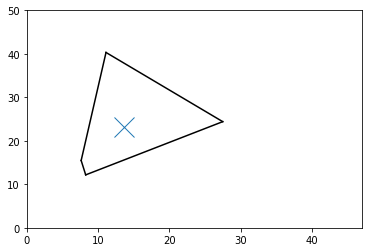

In [80]:
plotHull(hull,points)

In [75]:
reverse_moment[indexBallCaught][5][]

False

In [1]:
isInHull(hull,points,80,30)

NameError: name 'isInHull' is not defined

In [23]:
data['events'][164]["moments"]

[]